# Manim 的构建模块

本文档解释了 manim 的构建模块，并为您提供了开始制作自己的视频所需的所有工具。

本质上，manim 为您提供了三种不同的概念，您可以将它们组合在一起，以制作数学动画：**数学对象**（简称 **mobject**）、**动画**和**场景**。正如我们将在接下来的章节中看到的，这三个概念在 manim 中分别作为独立的类实现：{class}`.Mobject`、{class}`.Animation` 和 {class}`.Scene` 类。

```{note}
建议您在阅读此页面之前，先阅读教程 {doc}`quickstart` 和 {doc}`output_and_config`
```

## Mobjects

Mobjects 是所有 manim 动画的基本构建块。每个从 {class}`.Mobject` 派生的类都表示一个可以在屏幕上显示的对象。例如，简单的形状如 {class}`.Circle`、{class}`.Arrow` 和 {class}`.Rectangle` 都是 mobjects。更复杂的结构如 {class}`.Axes`、{class}`.FunctionGraph` 或 {class}`.BarChart` 也是 mobjects。

如果您尝试在屏幕上显示 {class}`.Mobject` 的实例，您只会看到一个空框架。原因是 {class}`.Mobject` 类是所有其他 mobjects 的抽象基类，即它没有任何预定义的视觉形状可以在屏幕上显示。它只是某个*可能*显示的东西的骨架。因此，您很少需要使用 {class}`.Mobject` 的普通实例；相反，您最有可能创建其派生类的实例。其中一个派生类是 {class}`.VMobject`。这里的“V”代表矢量化 Mobject。本质上，vmobject 是使用 [矢量图形](https://en.wikipedia.org/wiki/Vector_graphics) 来显示的 mobject。大多数情况下，您将处理 vmobjects，尽管我们继续使用术语“mobject”来指代可以在屏幕上显示的形状类，因为它更通用。

```{note}
任何可以在屏幕上显示的对象都是 ``mobject``，即使它不一定具有 *数学* 性质。
```

```{tip}
要查看从 {class}`.Mobject` 派生的类的示例，请参阅 {mod}`.geometry` 模块。其中大多数实际上也是从 {class}`.VMobject` 派生的。
```

### 创建和显示 Mobjects

正如在 {doc}`quickstart` 中所解释的，通常 manim 脚本中的所有代码都放在 {class}`.Scene` 类的 {meth}`.construct` 方法中。要在屏幕上显示一个 mobject，调用包含它的 {class}`.Scene` 的 {meth}`~.Scene.add` 方法。这是在没有动画时在屏幕上显示 mobject 的主要方法。要从屏幕上移除一个 mobject，只需从包含它的 {class}`.Scene` 中调用 {meth}`~.Scene.remove` 方法。


In [1]:
from manim import *

In [2]:
%%manim -v WARNING --disable_caching -qm CreatingMobjects

config.media_width = "25%"
config.media_embed = True

class CreatingMobjects(Scene):
    def construct(self):
        circle = Circle()
        self.add(circle)
        self.wait(1)
        self.remove(circle)
        self.wait(1)

Manim Community v0.18.1

### 放置 Mobjects

定义名为 ``Shapes`` 的新 {class}`.Scene`，并向其中 {meth}`~.Scene.add` 一些 mobjects。这个脚本生成了一张静态图片，显示了一个圆、一个正方形和一个三角形：

In [3]:
%%manim -v WARNING --disable_caching -qm Shapes

config.media_width = "25%"
config.media_embed = True

class Shapes(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        triangle = Triangle()

        circle.shift(LEFT)
        square.shift(UP)
        triangle.shift(RIGHT)

        self.add(circle, square, triangle)
        self.wait(1)

Manim Community v0.18.1

默认情况下，当 mobjects 首次创建时，它们会被放置在坐标系的中心，即*原点*。它们还会被赋予一些默认颜色。此外，``Shapes`` 场景通过使用 {meth}`.shift` 方法来放置 mobjects。正方形从原点向上（``UP`` 方向）移动了一个单位，而圆和三角形分别向左（``LEFT``）和向右（``RIGHT``）移动了一个单位。

```{note}
与其他图形软件不同，manim 将坐标系的中心放置在屏幕的中心。垂直正方向向上，水平正方向向右。请参阅 {mod}`.constants` 模块中定义的常量 ``ORIGIN``、``UP``、``DOWN``、``LEFT``、``RIGHT`` 等。
```
还有许多其他可能的方法可以在屏幕上放置 mobjects，例如 {meth}`.move_to`、{meth}`.next_to` 和 {meth}`.align_to`。下一个场景 ``MobjectPlacement`` 使用了所有三种方法。


In [4]:
%%manim -v WARNING --disable_caching -qm MobjectPlacement

config.media_width = "25%"
config.media_embed = True

class MobjectPlacement(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        triangle = Triangle()

        # place the circle two units left from the origin
        circle.move_to(LEFT * 2)
        # place the square to the left of the circle
        square.next_to(circle, LEFT)
        # align the left border of the triangle to the left border of the circle
        triangle.align_to(circle, LEFT)

        self.add(circle, square, triangle)
        self.wait(1)

Manim Community v0.18.1

{meth}`.move_to` 方法使用绝对单位（相对于 ``ORIGIN`` 测量），而 {meth}`.next_to` 使用相对单位（从作为第一个参数传递的 mobject 测量）。{meth}`align_to` 使用 ``LEFT`` 不是作为测量单位，而是作为一种确定对齐边框的方式。mobject 的边框坐标是通过围绕它的一个假想边界框来确定的。
```{eval-rst}
.. tip:: manim 中的许多方法可以链式调用。例如，以下两行代码：

         .. code-block:: python

             square = Square()
             square.shift(LEFT)

        可以替换为

         .. code-block:: python

             square = Square().shift(LEFT)

         从技术上讲，这是可能的，因为大多数方法调用都会返回修改后的 mobject。  
```

### 样式化 Mobjects

以下场景改变了 mobjects 的默认美学效果。

In [5]:
%%manim -v WARNING --disable_caching -qm MobjectStyling

config.media_width = "25%"
config.media_embed = True

class MobjectStyling(Scene):
    def construct(self):
        circle = Circle().shift(LEFT)
        square = Square().shift(UP)
        triangle = Triangle().shift(RIGHT)

        circle.set_stroke(color=GREEN, width=20)
        square.set_fill(YELLOW, opacity=1.0)
        triangle.set_fill(PINK, opacity=0.5)

        self.add(circle, square, triangle)
        self.wait(1)

Manim Community v0.18.1


这个场景使用了两个主要函数来改变 mobject 的视觉样式：{meth}`.set_stroke` 和 {meth}`.set_fill`。前者改变 mobject 边框的视觉样式，而后者改变内部样式。默认情况下，大多数 mobjects 的内部是完全透明的，因此您必须指定 ``opacity`` 参数来显示颜色。不透明度为 ``1.0`` 表示完全不透明，而 ``0.0`` 表示完全透明。

只有 {class}`.VMobject` 的实例实现了 {meth}`.set_stroke` 和 {meth}`.set_fill`。{class}`.Mobject` 的实例则实现了 {meth}`.~Mobject.set_color`。绝大多数预定义的类都是从 {class}`.VMobject` 派生的，因此通常可以安全地假设您可以访问 {meth}`.set_stroke` 和 {meth}`.set_fill`。

### Mobject 在屏幕上的顺序

下一个场景与上一节的 ``MobjectStyling`` 场景完全相同，除了其中的一行代码。

In [6]:
%%manim -v WARNING --disable_caching -qm MobjectZOrder

config.media_width = "25%"
config.media_embed = True

class MobjectZOrder(Scene):
    def construct(self):
        circle = Circle().shift(LEFT)
        square = Square().shift(UP)
        triangle = Triangle().shift(RIGHT)

        circle.set_stroke(color=GREEN, width=20)
        square.set_fill(YELLOW, opacity=1.0)
        triangle.set_fill(PINK, opacity=0.5)

        self.add(triangle, square, circle)
        self.wait(1)

Manim Community v0.18.1

这里唯一的区别（除了场景名称）是 mobjects 被添加到场景中的顺序。在 ``MobjectStyling`` 中，我们将它们添加为 ``add(circle, square, triangle)``，而在 ``MobjectZOrder`` 中，我们将它们添加为 ``add(triangle, square, circle)``。

正如您所看到的，{meth}`~.Scene.add` 参数的顺序决定了 mobjects 在屏幕上显示的顺序，最左边的参数会被放在后面。

## 动画

manim 的核心是动画。通常，您可以通过调用 {meth}`~.Scene.play` 方法将动画添加到场景中。

In [7]:
%%manim -v WARNING --disable_caching -qm SomeAnimations

config.media_width = "25%"
config.media_embed = True

class SomeAnimations(Scene):
    def construct(self):
        square = Square()

        # some animations display mobjects, ...
        self.play(FadeIn(square))

        # ... some move or rotate mobjects around...
        self.play(Rotate(square, PI/4))

        # some animations remove mobjects from the screen
        self.play(FadeOut(square))

        self.wait(1)

Manim Community v0.18.1


简而言之，动画是两个 mobject 之间的插值过程。例如，:code:`FadeIn(square)` 从一个完全透明的 :code:`square` 版本开始，并以一个完全不透明的版本结束，通过逐渐增加不透明度在它们之间进行插值。{class}`.FadeOut` 则以相反的方式工作：它从不透明插值到完全透明。再举一个例子，{class}`.Rotate` 从作为参数传递给它的 mobject 开始，并以相同但旋转了一定角度的对象结束，这次插值的是 mobject 的角度而不是其不透明度。

### 动画方法

任何可以改变的 mobject 属性都可以被动画化。事实上，任何改变 mobject 属性的方法都可以通过使用 {meth}`.animate` 作为动画。

In [8]:
%%manim -v WARNING --disable_caching -qm AnimateExample

config.media_width = "25%"
config.media_embed = True


class AnimateExample(Scene):
    def construct(self):
        square = Square().set_fill(RED, opacity=1.0)
        self.add(square)

        # animate the change of color
        self.play(square.animate.set_fill(WHITE))
        self.wait(1)

        # animate the change of position and the rotation at the same time
        self.play(square.animate.shift(UP).rotate(PI / 3))
        self.wait(1)

Manim Community v0.18.1

{meth}`.animate` 是所有 mobject 的属性，它将后续的方法动画化。例如，:code:`square.set_fill(WHITE)` 设置正方形的填充颜色，而 :code:`square.animate.set_fill(WHITE)` 则将此操作动画化。

### 动画运行时间

默认情况下，传递给 {meth}`play` 的任何动画持续时间为一秒钟。使用 :code:`run_time` 参数来控制持续时间。

In [9]:
%%manim -v WARNING --disable_caching -qm RunTime

config.media_width = "25%"
config.media_embed = True

class RunTime(Scene):
    def construct(self):
        square = Square()
        self.add(square)
        self.play(square.animate.shift(UP), run_time=3)
        self.wait(1)

Manim Community v0.18.1

### 创建自定义动画

尽管 Manim 提供了许多内置动画，但在某些情况下，您可能需要将一个 {class}`~.Mobject` 从一个状态平滑地过渡到另一个状态。如果您遇到这种情况，可以定义自己的自定义动画。首先，您需要扩展 {class}`~.Animation` 类并重写其 {meth}`~.Animation.interpolate_mobject` 方法。{meth}`~.Animation.interpolate_mobject` 方法接收一个名为 alpha 的参数，该参数从 0 开始，并在动画过程中变化。因此，您只需根据 alpha 值在 interpolate_mobject 方法中操作 self.mobject。这样，您就可以获得 {class}`~.Animation` 的所有好处，例如为不同的运行时间播放动画或使用不同的速率函数。

假设您从一个数字开始，并希望创建一个 {class}`~.Transform` 动画，将其转换为目标数字。您可以使用 {class}`~.FadeTransform`，它会淡出起始数字并淡入目标数字。但当我们考虑将一个数字从一个值转换到另一个值时，一种直观的方法是通过平滑地递增或递减它。Manim 提供了一个功能，允许您通过定义自己的自定义动画来自定义此行为。

您可以首先创建一个扩展 {class}`~.Animation` 的 ``Count`` 类。该类可以有一个包含三个参数的构造函数：一个 {class}`~.DecimalNumber` Mobject、起始值和结束值。构造函数将 {class}`~.DecimalNumber` Mobject 传递给超类构造函数（在本例中为 {class}`~.Animation` 构造函数），并设置起始值和结束值。

您唯一需要做的就是定义在动画的每一步中希望它如何显示。Manim 在 {meth}`~.Animation.interpolate_mobject` 方法中为您提供了 alpha 值，该值基于视频的帧率、速率函数和动画的运行时间。alpha 参数的值在 0 到 1 之间，表示当前播放的动画的步骤。例如，0 表示动画的开始，0.5 表示动画的中间，1 表示动画的结束。

在 ``Count`` 动画的情况下，您只需找到一种方法来确定在给定的 alpha 值下要显示的数字，然后在 ``Count`` 动画的 {meth}`~.Animation.interpolate_mobject` 方法中设置该值。假设您从 50 开始，并在动画结束时递增到 100。

* 如果 alpha 为 0，您希望显示的值为 50。
* 如果 alpha 为 0.5，您希望显示的值为 75。
* 如果 alpha 为 1，您希望显示的值为 100。

通常，您从起始数字开始，并根据 alpha 值仅添加部分递增值。因此，计算每一步要显示的数字的逻辑将是 ``50 + alpha * (100 - 50)``。一旦为 {class}`~.DecimalNumber` 设置了计算值，您就完成了。

一旦定义了 ``Count`` 动画，您可以在 {class}`~.Scene` 中为任何持续时间播放它，适用于任何 {class}`~.DecimalNumber`，并使用任何速率函数。

`````
.. manim:: CountingScene
    :ref_classes: Animation DecimalNumber
    :ref_methods: Animation.interpolate_mobject Scene.play

    class Count(Animation):
        def __init__(self, number: DecimalNumber, start: float, end: float, **kwargs) -> None:
            # Pass number as the mobject of the animation
            super().__init__(number,  **kwargs)
            # Set start and end
            self.start = start
            self.end = end

        def interpolate_mobject(self, alpha: float) -> None:
            # Set value of DecimalNumber according to alpha
            value = self.start + (alpha * (self.end - self.start))
            self.mobject.set_value(value)


    class CountingScene(Scene):
        def construct(self):
            # Create Decimal Number and add it to scene
            number = DecimalNumber().set_color(WHITE).scale(5)
            # Add an updater to keep the DecimalNumber centered as its value changes
            number.add_updater(lambda number: number.move_to(ORIGIN))

            self.add(number)

            self.wait()

            # Play the Count Animation to count from 0 to 100 in 4 seconds
            self.play(Count(number, 0, 100), run_time=4, rate_func=linear)

            self.wait()
`````


### 使用 Mobject 的坐标

Mobject 包含定义其边界的点。这些点可以用于将其他 Mobject 分别添加到彼此的位置，例如通过使用 {meth}`~.Mobject.get_center`、{meth}`~.Mobject.get_top` 和 {meth}`~.Mobject.get_start` 等方法。以下是一些重要坐标的示例：


Manim Community v0.18.1

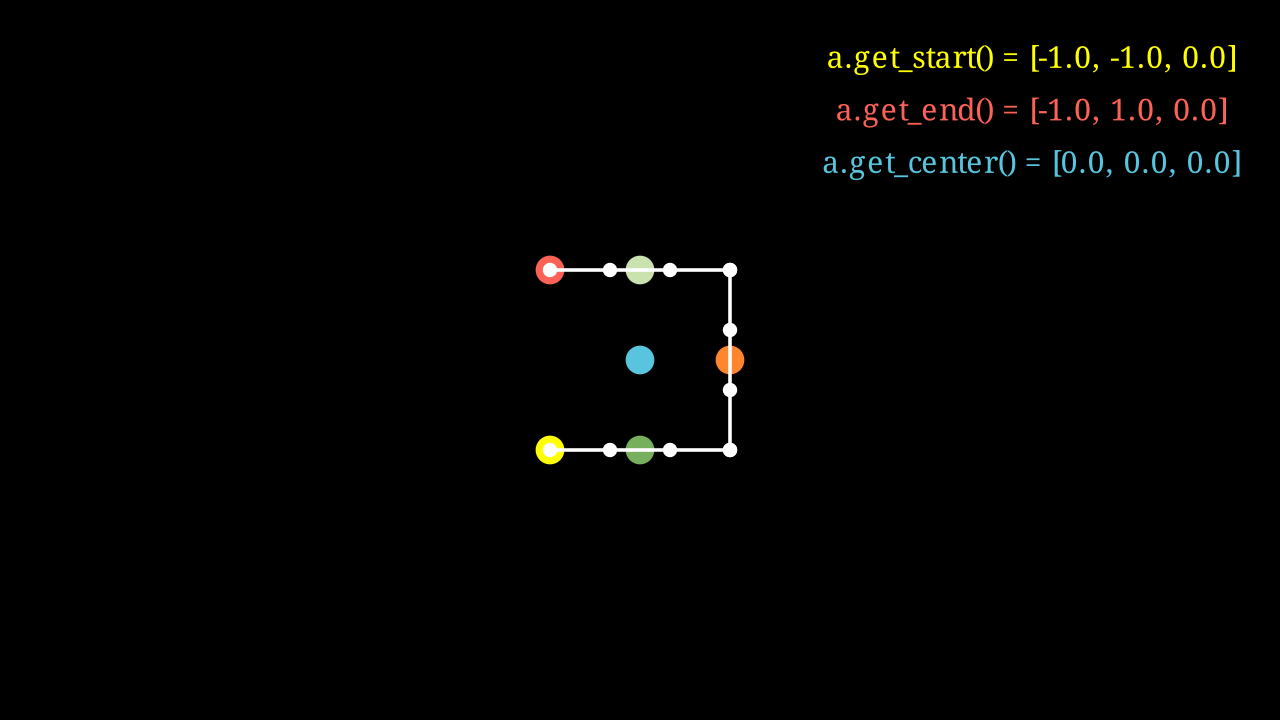

In [11]:
%%manim -v WARNING --disable_caching -qm MobjectExample

config.media_width = "25%"
config.media_embed = True

class MobjectExample(Scene):
    def construct(self):
        p1 = [-1,-1, 0]
        p2 = [ 1,-1, 0]
        p3 = [ 1, 1, 0]
        p4 = [-1, 1, 0]
        a  = Line(p1,p2).append_points(Line(p2,p3).points).append_points(Line(p3,p4).points)
        point_start  = a.get_start()
        point_end    = a.get_end()
        point_center = a.get_center()
        self.add(Text(f"a.get_start() = {np.round(point_start,2).tolist()}", font_size=24).to_edge(UR).set_color(YELLOW))
        self.add(Text(f"a.get_end() = {np.round(point_end,2).tolist()}", font_size=24).next_to(self.mobjects[-1],DOWN).set_color(RED))
        self.add(Text(f"a.get_center() = {np.round(point_center,2).tolist()}", font_size=24).next_to(self.mobjects[-1],DOWN).set_color(BLUE))

        self.add(Dot(a.get_start()).set_color(YELLOW).scale(2))
        self.add(Dot(a.get_end()).set_color(RED).scale(2))
        self.add(Dot(a.get_top()).set_color(GREEN_A).scale(2))
        self.add(Dot(a.get_bottom()).set_color(GREEN_D).scale(2))
        self.add(Dot(a.get_center()).set_color(BLUE).scale(2))
        self.add(Dot(a.point_from_proportion(0.5)).set_color(ORANGE).scale(2))
        self.add(*[Dot(x) for x in a.points])
        self.add(a)

### 将 Mobject 转换为其他 Mobject

也可以像这样将一个 Mobject 转换为另一个 Mobject：

In [12]:
%%manim -v WARNING --disable_caching -qm ExampleTransform

config.media_width = "25%"
config.media_embed = True

class ExampleTransform(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        m1 = Square().set_color(RED)
        m2 = Rectangle().set_color(RED).rotate(0.2)
        self.play(Transform(m1,m2))

Manim Community v0.18.1

`Transform` 函数将前一个 Mobject 的点映射到下一个 Mobject 的点。
这可能会导致奇怪的行为，例如当一个 Mobject 的点按顺时针排列，而另一个 Mobject 的点按逆时针排列时。
在这种情况下，使用 `flip` 函数并通过 numpy 的 `roll` 函数重新排列点可能会有所帮助：

In [13]:
%%manim -v WARNING --disable_caching -qm ExampleRotation

config.media_width = "25%"
config.media_embed = True

class ExampleRotation(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        m1a = Square().set_color(RED).shift(LEFT)
        m1b = Circle().set_color(RED).shift(LEFT)
        m2a = Square().set_color(BLUE).shift(RIGHT)
        m2b = Circle().set_color(BLUE).shift(RIGHT)

        points = m2a.points
        points = np.roll(points, int(len(points)/4), axis=0)
        m2a.points = points

        self.play(Transform(m1a,m1b),Transform(m2a,m2b), run_time=1)

Manim Community v0.18.1

## 场景

{class}`.Scene` 类是 Manim 的连接组织。每个 Mobject 都必须通过 {meth}`添加 <.Scene.add>` 到场景中才能显示，或者通过 {meth}`移除 <.Scene.remove>` 以停止显示。
每个动画都必须由场景 {meth}`播放 <.Scene.play>`，并且每个没有动画发生的时段都由 {meth}`~.Scene.wait` 调用来确定。
视频的所有代码必须包含在派生自 {class}`.Scene` 的类的 {meth}`~.Scene.construct` 方法中。最后，如果要在同一时间渲染多个场景，单个文件可以包含多个 {class}`.Scene` 子类。